In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
train_path = Path('artifacts/train_data.csv')
train_pd = pd.read_csv(train_path)
train_pd.head(5)

,time,row,column,value
0,3,7,3,0
1,597,2,3,105
2,417,5,2,0
3,654,4,5,63
4,183,7,2,0


In [3]:
train_pd = train_pd.assign(
    hour = train_pd['time']%24,
    day = train_pd['time']//24,
    day_of_week = (train_pd['time']//24)%7
)

In [4]:
train_pd.head(5)

,time,row,column,value,hour,day,day_of_week
0,3,7,3,0,3,0,0
1,597,2,3,105,21,24,3
2,417,5,2,0,9,17,3
3,654,4,5,63,6,27,6
4,183,7,2,0,15,7,0


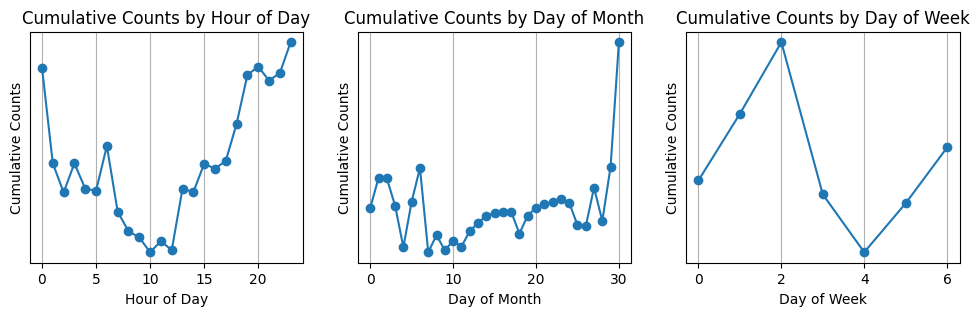

In [9]:
fig , (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))

ax1.plot(train_pd.groupby('hour')['value'].sum(), marker='o')
ax1.set_title('Cumulative Counts by Hour of Day')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Cumulative Counts')
ax1.yaxis.set_ticks([])
ax1.grid(True)

ax2.plot(train_pd.groupby('day')['value'].sum(), marker='o')
ax2.set_title('Cumulative Counts by Day of Month')
ax2.set_xlabel('Day of Month')
ax2.set_ylabel('Cumulative Counts')
ax2.yaxis.set_ticks([])
ax2.grid(True)

ax3.plot(train_pd.groupby('day_of_week')['value'].sum(), marker='o')
ax3.set_title('Cumulative Counts by Day of Week')
ax3.set_xlabel('Day of Week')
ax3.set_ylabel('Cumulative Counts')
ax3.yaxis.set_ticks([])
ax3.grid(True)